In [86]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import random

In [87]:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.5)

In [88]:
# check the number of samples and size of each sample
n_samples, h, w = lfw_people.images.shape
print(n_samples, h, w)

1288 62 47


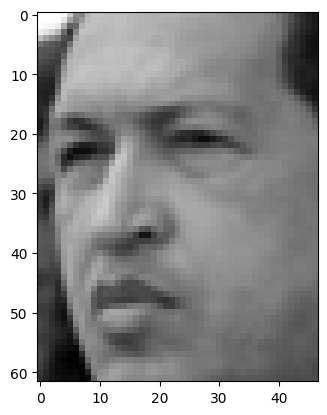

In [89]:
images = lfw_people.images
plt.imshow(images[0], cmap = 'gray')

X = images.flatten().reshape(n_samples, h*w)
n_features = X.shape[1]
# print(X[0])

# # we can use the below way to get flatten images
# X = lfw_people.data
# n_features = X.shape[1]
# print(X[0])

In [90]:
# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

scaler = StandardScaler() # normalize the data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [92]:
n_components = 200
pca = PCA(n_components=n_components, svd_solver="randomized", whiten=True).fit(X_train)
# eigenfaces = pca.components_.reshape((n_components, h, w))
eigenfaces = pca.components_[:n_components]

In [93]:
# Generate weights as a KxN matrix where K is the number of eigenfaces and N the number of samples
print(eigenfaces.shape, pca.mean_.shape, X_train.shape)
weights = eigenfaces @ (X_train - pca.mean_).T
print("Shape of the weight matrix:", weights.shape)

(200, 2914) (2914,) (966, 2914)
Shape of the weight matrix: (200, 966)


In [104]:
index = random.randrange(len(X_test))
print(index)
query = X_test[index].reshape(1,-1)
query_weight = eigenfaces @ (query - pca.mean_).T
# print(query_weight.shape)
euclidean_distance = np.linalg.norm(weights - query_weight, axis=0)
best_match = np.argmin(euclidean_distance)
print(y_train[best_match], y_test[index])

320
1 1
